In [5]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, N):           
    y = np.zeros(len(x)-(N-1))
    for i in range(0, len(y)):
        y[i] = np.sum(x[i:i+N])/N
    return y

def moving_average_vhdl(x, N):           
    y = np.zeros(len(x)-(N-1))
    for i in range(0, len(y)):
        y[i] = int(np.sum(x[i:i+N])/N) 
    return y


x = np.array([4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11])
y_vhdl = np.zeros(len(x))

for i in range(4):
    if i == 0:
        y_vhdl = moving_average_vhdl(x, 4)
    else:
        y_vhdl = moving_average_vhdl(y_vhdl, 4)
        
print(y_vhdl)
print(len(y_vhdl))

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
12


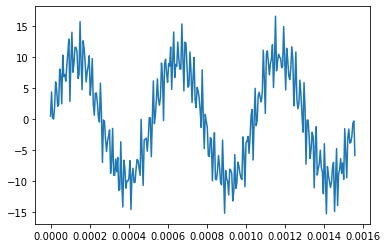

In [16]:
sampling_rate = 192000
# main signal frequency
frequency = sampling_rate/100
t = np.arange(0, 3*(1/frequency), (1/sampling_rate))
# taps
n = 4 
# main signal component
amplitude = 10
x0 = amplitude*np.sin(2*np.pi*frequency*t)
# components to be filtered
f_cutoff = (1/n)*sampling_rate
x1 = 0.3*amplitude*np.sin(2*np.pi*f_cutoff*t)
x2 = 0.2*amplitude*np.sin(2*np.pi*((1/n)+0.1)*sampling_rate*t)
x3 = 0.1*amplitude*np.sin(2*np.pi*((1/n)+0.2)*sampling_rate*t)
# gaussian noise
np.random.seed(1234)
noise = np.random.normal(0, 1, len(t))
# complete signal
x = x0 + x1 + x2 + x3 + noise

plt.plot(t, x)

[-3.51582858 -2.99496509 -2.34388572 -1.82302223 -1.17194286 -0.52086349
  0.          0.78129524  1.43237461  2.08345397]


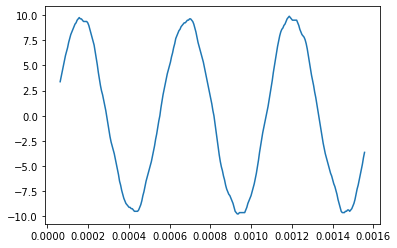

In [17]:
taps = 4
N = 4

# pre-processing for vhdl
s = 1/max(abs(x)) # scale input to be between 1 and -1
c = 127 # max imput value
x_vhdl = np.array([int(i*s*c) for i in x])

y_vhdl = np.zeros(len(x))

for i in range(N):
    if i == 0:
        y_vhdl = moving_average_vhdl(x_vhdl, taps)
    else:
        y_vhdl = moving_average_vhdl(y_vhdl, taps)
        
y_vhdl = y_vhdl/(s*c) 
print(y_vhdl[100-(taps-1)*N:110-(taps-1)*N])
plt.plot(t[(taps-1)*N:], y_vhdl)